# Data Analysis of New York Traffic Violations 

## Motivation
There are about 6 million traffic accidents in the USA each year. Traffic accidents are 
Here, we are reading in a dataset of traffic violations downloaded from https://data.ny.gov/Transportation/Traffic-Tickets-Issued-Four-Year-Window/q4hy-kbtf. The intention is to extract useful patterns in traffic violations that will be helpful for the police department in order to better manage traffic violations. Also, this analysis could potentially be useful for the everyday commuter. For this project, I used a public dataset released by the New York State DMV for traffic violations in a four-year window between 2013 and 2016. Data extracted from records of tickets on file with NYS DMV. The tickets were issued to motorists for violations of

We start off by loading the dataset as a csv file. This raw dataset contains 1.5 GB of data with about 3 million rows. Let's read in this data into a dataframe and view the data.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.ticker as ticker
from matplotlib.cm import plasma
pd.options.mode.chained_assignment = None

df = pd.read_csv('Traffic_Tickets_Issued__Four_Year_Window.csv', index_col=False, header=0)
df2 = df.dropna()  # we ignore rows with incomplete data
print(df2.head(5))



  Violation Charged Code      Violation Description  Violation Year  \
0                   306B  UNINSPECTED MOTOR VEHICLE            2016   
1                  1180B         SPEED OVER 55 ZONE            2016   
2                  1180B         SPEED OVER 55 ZONE            2016   
3                  1180D              SPEED IN ZONE            2016   
4                  1180B         SPEED OVER 55 ZONE            2016   

   Violation Month Violation Day of Week  Age at Violation Gender  \
0                3               TUESDAY              21.0      M   
1                3              SATURDAY              18.0      F   
2                2             WEDNESDAY              55.0      M   
3                2                SUNDAY              41.0      M   
4                1              THURSDAY              25.0      M   

  State of License              Police Agency             Court Source  
0         NEW YORK  1000 ISLAND ST PRK POLICE  ADAMS TOWN COURT  TSLED  
1         NE


Let's jump into the analysis. For starters, let's look at which months have the highest number of violations. At this point, it would be expected that the summer months have higher number of violations simply because theere are more drivers on the road. But we shall see.


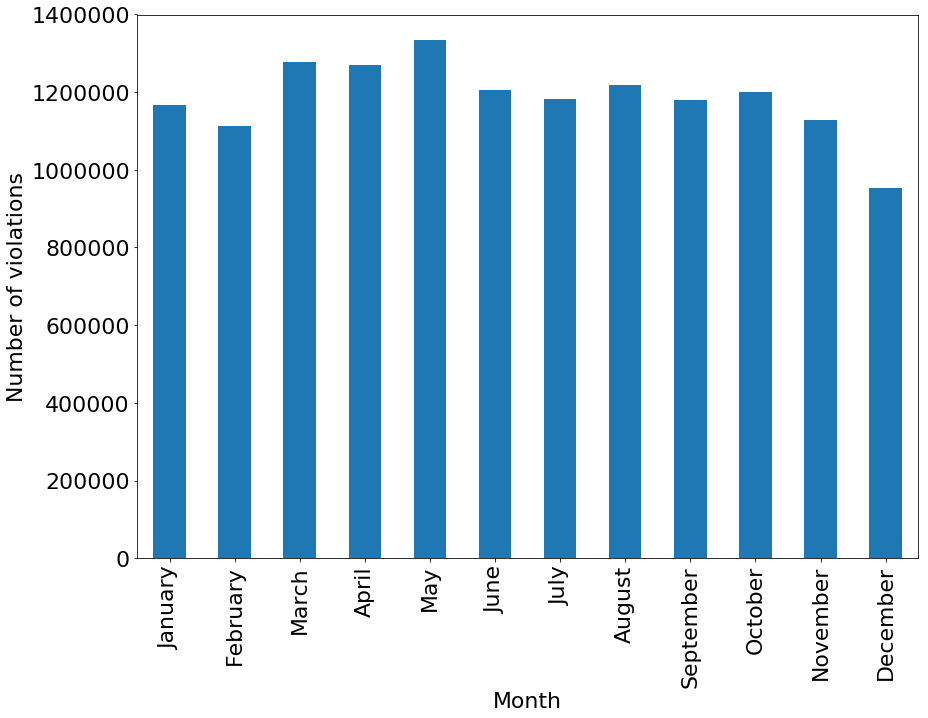

In [27]:

violmonth = df2['Violation Month'].value_counts().sort_index()
fig, ax = plt.subplots()
violmonth.plot(ax=ax,kind='bar')
x1 = [0,1,2,3,4,5,6,7,8,9,10,11]
squad = ['January','February','March','April','May','June','July','August','September','October','November','December']

matplotlib.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (5,5)

ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=90)
plt.xlabel('Month')
plt.ylabel('Number of violations')
plt.show()


While we are seeing that the highest number of violations are committed in the months of March-May, it is rather surprising that the months of June-September (which would involve large amounts of travel) having a dip in the number of violations.

Next, let's look at the distribution of traffic violations on different days of the week.


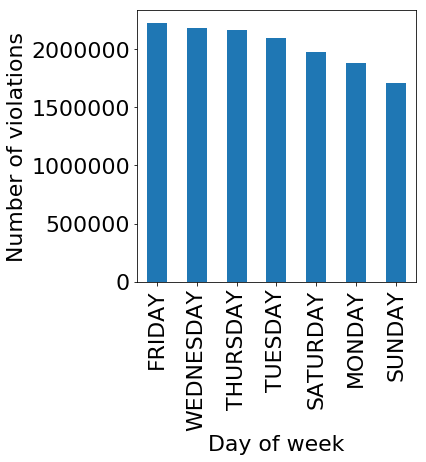

In [28]:
violday = df2['Violation Day of Week'].value_counts()
fig, ax = plt.subplots()

violday.plot(ax=ax,kind='bar')
plt.xlabel('Day of week')
plt.ylabel('Number of violations')
plt.show()

## How does Age play a role?
Let's also look at the ages of violation. We can expect younger people to commit more traffic violations due to lack of experience.

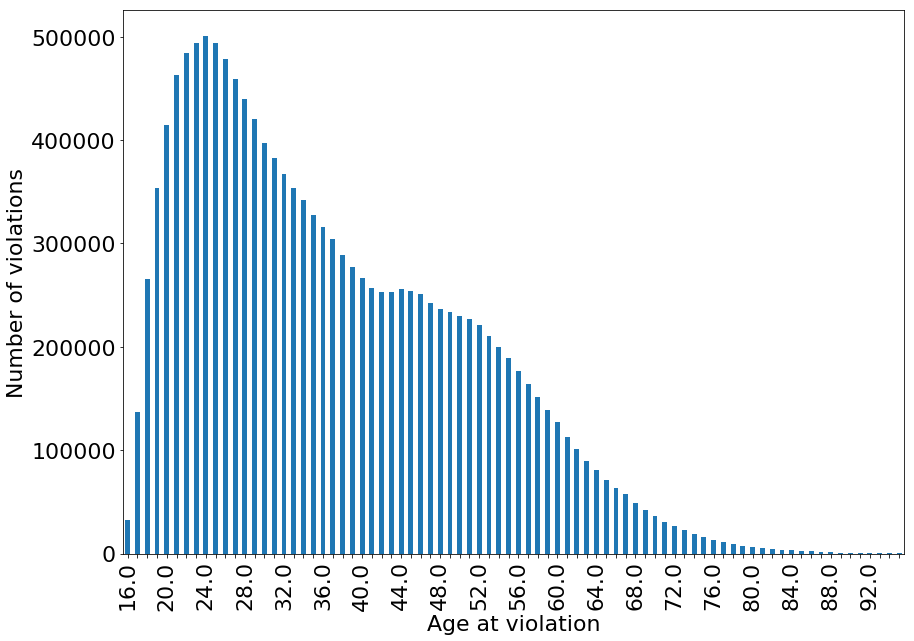

In [30]:
violage = df2['Age at Violation'].value_counts().sort_index()
fig, ax = plt.subplots()
violage.plot(ax=ax,kind='bar')
plt.rcParams["figure.figsize"] = (14,10)
ticklabels = ['']*len(violage.index)
# Every 4th ticklable shows the month and day
ticklabels[::4] = [item for item in violage.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.xlabel('Age at violation')
plt.ylabel('Number of violations')
plt.show()

It is interesting to note that there is almost a bimodal distribution of violations, with one peak around the 21 year old mark and another at the 44 year mark.

We can also bin the data into different age groups to help further analysis.

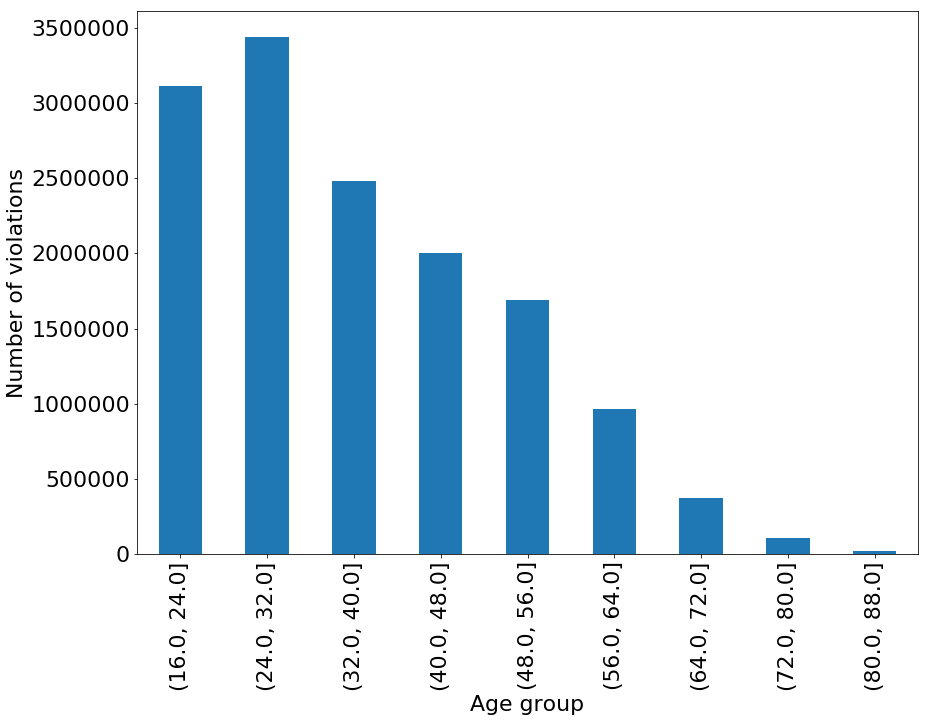

In [6]:

agebins = np.linspace(16,88,10)
df2['agebinned'] = pd.cut(df2['Age at Violation'], agebins)
violagebins = df2['agebinned'].value_counts().sort_index()


fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (14,10)
violagebins.plot(ax=ax,kind='bar')
plt.xlabel('Age group')
plt.ylabel('Number of violations')
plt.show()

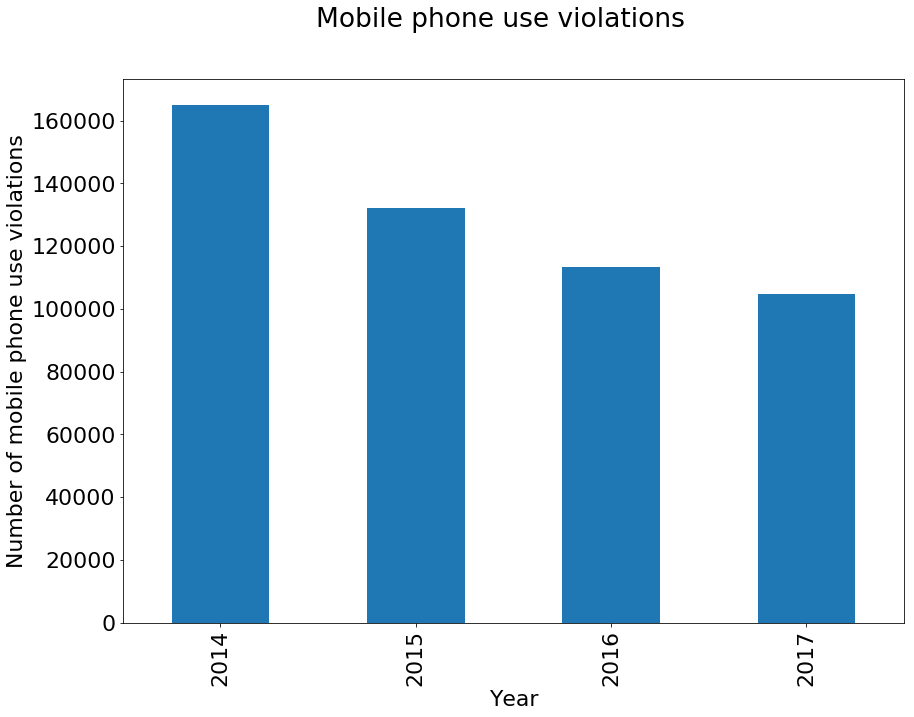

In [7]:
phone_df = df2.loc[df2['Violation Description'] == 'OPERATING MV MOBILE PHONE']
phoneviolyear = phone_df['Violation Year'].value_counts()
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (14,10)
phoneviolyear.plot(ax=ax,kind='bar')
fig.suptitle('Mobile phone use violations')
plt.xlabel('Year')
plt.ylabel('Number of mobile phone use violations')
plt.show()

In [8]:
speedingdf = df2[df2['Violation Description'].str.contains("SPEED")]


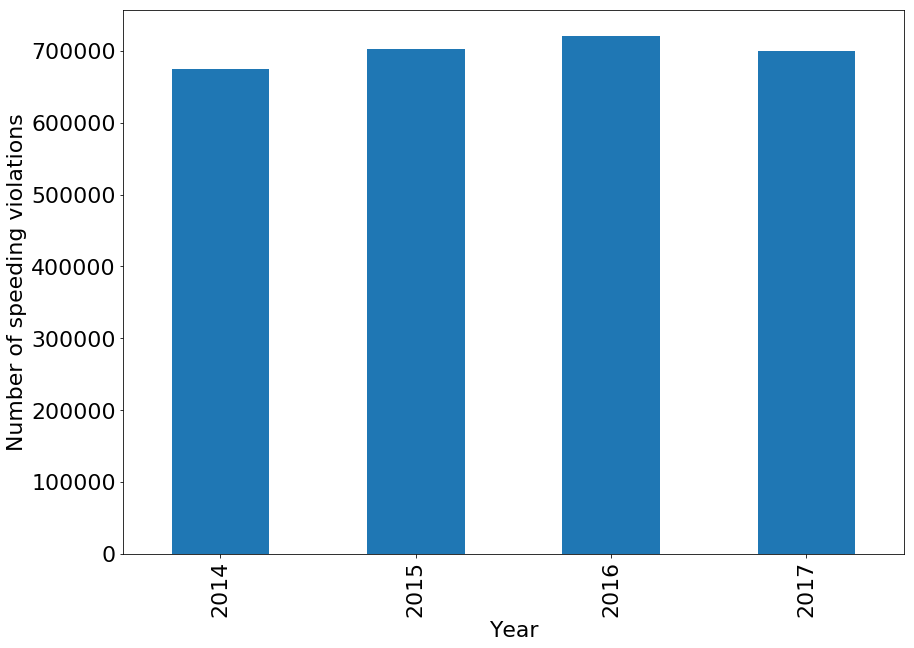

In [14]:
speedingviolyear = speedingdf['Violation Year'].value_counts().sort_index()
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (14,10)
speedingviolyear.plot(ax=ax,kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of speeding violations')
plt.show()

In [24]:
males = df2.loc[df2['Gender'] == 'M'].shape[0]
females = df2.loc[df2['Gender'] == 'F'].shape[0]
unknown = df2.shape[0] - males - females
print (males,females,unknown)

10285206 3945518 177


([<matplotlib.patches.Wedge at 0x21213b9af28>,
 [Text(-0.8414831782070457, -0.7084532876588051, 'Males'),
  Text(0.8414831782070458, 0.7084532876588051, 'Females')],
 [Text(-0.45899082447657025, -0.3864290659957118, '72.3%'),
  Text(0.45899082447657036, 0.3864290659957118, '27.7%')])

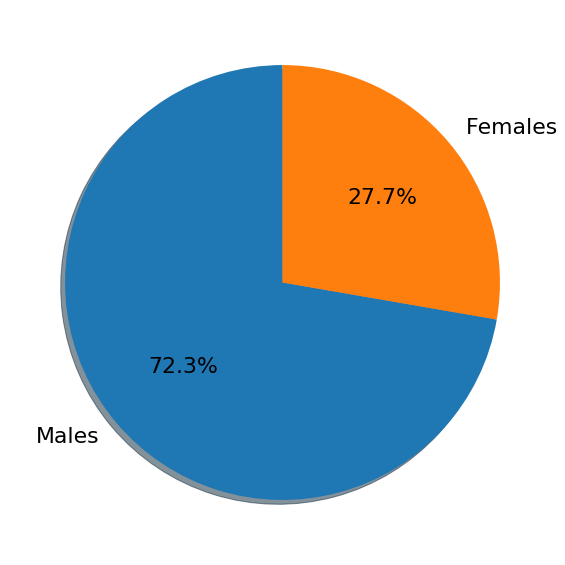

In [26]:
labels = 'Males','Females'
sizes = [males,females]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)